In [35]:
ls

 磁碟區 C 中的磁碟是 OS_Install
 磁碟區序號:  71D0-E9EE

 C:\Users\user 的目錄

2017/01/19  上午 01:27    <DIR>          .
2017/01/19  上午 01:27    <DIR>          ..
2017/01/16  下午 05:40    <DIR>          .anaconda
2017/01/18  上午 10:14    <DIR>          .android
2017/01/18  上午 10:13    <DIR>          .BigNox
2016/10/19  上午 12:42               157 .gitconfig
2017/01/19  上午 12:44    <DIR>          .ipynb_checkpoints
2017/01/16  下午 05:44    <DIR>          .ipython
2017/01/18  下午 11:55    <DIR>          .jupyter
2017/01/19  上午 12:38    <DIR>          .matplotlib
2016/11/13  上午 10:53    <DIR>          .MemuHyperv
2016/07/23  下午 03:03    <DIR>          .oracle_jre_usage
2017/01/15  下午 02:12    <DIR>          .spss
2017/01/18  下午 11:00    <DIR>          .spyder-py3
2017/01/19  上午 01:27            25,956 20170119Meetng.ipynb
2014/10/12  下午 09:16                 0 agent.log
2017/01/19  上午 12:44    <DIR>          Anaconda3
2017/01/11  下午 03:28    <DIR>          Contacts
2017/01/19  上午 12:52    <DIR>          Deskt

<h1>建立兩筆備用資料<h1>

In [1]:
num_friends = [100, 49, 41, 40, 25, 25, 77 ,98, 87,87 ,99 ,12 ,6,1,1,1,1,55,54,23]
daily_minutes = [55, 49, 41, 40, 25, 25, 82 ,3, 87,87 ,99 ,42,6,1,1,4,1,55,4,23]

In [2]:
from matplotlib import pyplot as plt
from collections import Counter
from __future__ import division

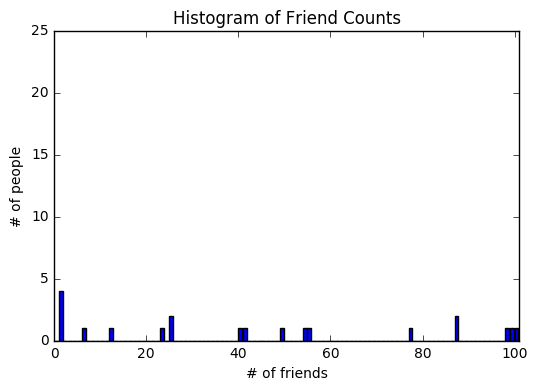

In [3]:
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [12]:
num_points = len(num_friends)
num_points

20

In [13]:
smallest_value = min(num_friends) # 1
smallest_value

1

In [14]:
largest_value = max(num_friends) # 100
largest_value

100

In [15]:
sorted_values = sorted(num_friends)
sorted_values

[1, 1, 1, 1, 6, 12, 23, 25, 25, 40, 41, 49, 54, 55, 77, 87, 87, 98, 99, 100]

In [16]:
second_largest_value = sorted_values[-2]
second_largest_value

99

Central Tendencies

Usually, we’ll want some notion of where our data is centered. Most commonly we’ll
use the mean (or average), which is just the sum of the data divided by its count:


<h1>mean function<h1>

In [17]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

44.1

<h2 style="color:red">median function<h2>

In [19]:
def median(v):
#"""finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
# if odd, return the middle value
        return sorted_v[midpoint]
    else:
# if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends) 

40.5

<h3 style="color:pink">quantil function <h3>     

<h3 style="color:##003399">quantile function <h3>     

In [23]:
def quantile(x, p):
#"""returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]
quantile(num_friends, 0.10) 
quantile(num_friends, 0.25) 
quantile(num_friends, 0.75) 
quantile(num_friends, 0.90) 

99

<h3 style="color:#006666">mode function <h3>     

In [24]:
def mode(x):
#"""returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i 
            for x_i, count in counts.items()  #counts.iteritems()
        if count == max_count]
mode(num_friends)

[1]

<h3 style="color:#ffcc33">range function <h3>     

In [25]:
def data_range(x):
    return max(x) - min(x)
data_range(num_friends)

99

<h3 style="color:#cc3300">variance function <h3>     

In [27]:
#計算xi-x.bar
def de_mean(x):
#"""translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


#計算兩點
def dot(v, w):
#"""v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))  #跳到下一個
    
    
def sum_of_squares(v):
#"""v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)


def variance(x):
#"""assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
variance(num_friends)

1324.3052631578946

<h3 style="color:#990099  ">variance function <h3>     

In [28]:

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
covariance(num_friends, daily_minutes)

847.5263157894736

<h3 style="color:#cc0000  ">standard_deviation function <h3>     

In [32]:
import math


def standard_deviation(x):
    return math.sqrt(variance(x))
standard_deviation(num_friends)

36.39100525071951

<h3 style="color:#3366cc">standard_deviation function <h3>   

In [33]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
correlation(num_friends, daily_minutes)

0.711227347386637